In [0]:
# Importing the Keras libraries and packages
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
from keras.layers import Dropout
import pickle
import matplotlib.pyplot as plt
import numpy as np

Using TensorFlow backend.


In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
# Initialising the CNN
classifier = Sequential()

# Step 1 - Convolution
classifier.add(Conv2D(32, (3, 3), input_shape = (64, 64, 3), activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (2, 2)))

# Adding a second convolutional layer
classifier.add(Conv2D(32, (3, 3), activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (2, 2)))

# Adding a third convolutional layer
classifier.add(Conv2D(32, (3, 3), activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (2, 2)))

In [0]:
# Step 3 - Flattening
classifier.add(Flatten())

# Step 4 - Full connection
classifier.add(Dense(units = 64, activation = 'relu'))
classifier.add(Dropout(p = 0.1))
classifier.add(Dense(units = 128, activation = 'relu'))
classifier.add(Dropout(p = 0.2))
classifier.add(Dense(units = 1, activation = 'sigmoid'))

# Compiling the CNN
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: UserWarning: Update your `Dropout` call to the Keras 2 API: `Dropout(rate=0.1)`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: UserWarning: Update your `Dropout` call to the Keras 2 API: `Dropout(rate=0.2)`
  


In [0]:
classifier.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 62, 62, 32)        896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 31, 31, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 29, 29, 32)        9248      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 12, 12, 32)        9248      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 6, 6, 32)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 1152)             

In [0]:
# Part 2 - Fitting the CNN to the images

from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

training_set = train_datagen.flow_from_directory('/content/drive/My Drive/data/train',
                                                 target_size = (64, 64),
                                                 batch_size = 32,
                                                 class_mode = 'binary')

test_set = test_datagen.flow_from_directory('/content/drive/My Drive/data/test',
                                            target_size = (64, 64),
                                            batch_size = 32,
                                            class_mode = 'binary')

history=classifier.fit_generator(training_set,
                         steps_per_epoch =180,
                         epochs = 6,
                         validation_data = test_set,
                         validation_steps = 48)

Found 180 images belonging to 2 classes.
Found 48 images belonging to 2 classes.
Epoch 1/6
180/180 [==============================] - 445s 2s/step - loss: 0.2289 - accuracy: 0.8994 - val_loss: 0.0358 - val_accuracy: 0.9792
Epoch 2/6
180/180 [==============================] - 335s 2s/step - loss: 0.0996 - accuracy: 0.9639 - val_loss: 0.2742 - val_accuracy: 0.9583
Epoch 3/6
180/180 [==============================] - 336s 2s/step - loss: 0.0539 - accuracy: 0.9815 - val_loss: 0.0057 - val_accuracy: 0.9792
Epoch 4/6
180/180 [==============================] - 336s 2s/step - loss: 0.0371 - accuracy: 0.9881 - val_loss: 0.1180 - val_accuracy: 0.9583
Epoch 5/6
180/180 [==============================] - 337s 2s/step - loss: 0.0177 - accuracy: 0.9935 - val_loss: 0.0093 - val_accuracy: 0.9583
Epoch 6/6
180/180 [==============================] - 336s 2s/step - loss: 0.0192 - accuracy: 0.9930 - val_loss: 2.7138e-04 - val_accuracy: 0.9792


In [0]:
#Summarising the Results
import numpy as np

a=list(history.history['accuracy'])
b=list(history.history['val_accuracy'])
max_train=100*np.round(max(a),4)
max_validation=100*np.round(max(b),4)

#Finding max of Training accuracy
print("Maximum Training Accuracy is",max_train)

#Finding max  validation accuracy
print("Maximum Validtion Accuracy is",max_validation)
        

Maximum Training Accuracy is 99.34999942779541
Maximum Validtion Accuracy is 97.92


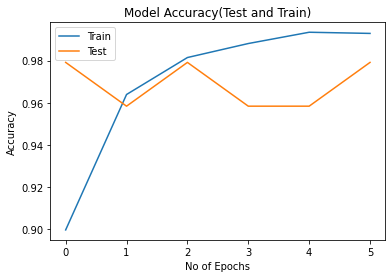

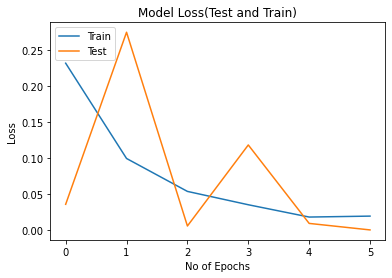

In [0]:
#Plotting Test vs Train Accuracy
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy(Test and Train)')
plt.ylabel('Accuracy')
plt.xlabel('No of Epochs')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

#Plotting Test vs Train Loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss(Test and Train)')
plt.ylabel('Loss')
plt.xlabel('No of Epochs')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [0]:
# save the model to disk
filename = 'final_corona_model.pkl'
pickle.dump(classifier, open(filename, 'wb'))

    
# load the model from disk
loaded_model = pickle.load(open(filename, 'rb'))

In [0]:
#Making predictions using saved model

from keras.preprocessing import image
test_image = image.load_img('/content/drive/My Drive/data/val/sample.jpeg', target_size = (64, 64))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = loaded_model.predict(test_image)
if result[0][0] == 1:
    prediction = 'Corona'
else:
    prediction = 'Normal'
print(prediction)

#Corona

Corona
